# El mago no se ha despertado

Seba y Cristian apostaron a que hora se va a *despertar* (leer los mensajes) el mago. 

Cristian apuesta primero y luego Sebastian elige una hora. Pero como Cristian va primero, Sebastian tiene dos opciones efectivas: antes de la hora que dijo Cristian o despues. Dado esto, Cristian esta efectivamente eligiendo una hora de corte.

Cual es la estrategia optima de apuesta?

In [2]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline

/Users/cristianjf/allVEnvs/global3/lib/python3.7/site-packages/ipykernel_launcher.py:36: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


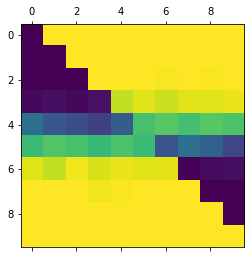

In [6]:
def wakeup(corte,P2):
    '''
    Dados el corte y la apuesta, calcula quien gana.
    Zero para el player 1, uno para el player 2. 
    '''
    despierta = np.random.normal(loc=0.5,scale=0.1) # Distribucion real de la hora que despierta  
    if (despierta>corte) and (P2=='high'):
        return 1
    elif (despierta<corte) and (P2=='low'):
        return 1
    else:
        return 0

def bet(corte,mu2=0.7):
    '''
    Dada una hora de corte, y el promedio de la distribucion del jugador 2, elegir la apuesta.
    '''
    if norm(loc=mu2).cdf(corte)<0.5:
        return 'high'
    else:
        return 'low'

MU1 = np.linspace(0,1,10)
MU2 = np.linspace(0,1,10)

out = []
for corte in MU1: # P1 elige el corte
    for mu2 in MU2: 
        P2 = bet(corte,mu2) # Dado el promedio de la distribucion de P2, P2 elige su apuesta
        p2_wins = np.mean([wakeup(corte,P2) for i in range(100)]) # Simula cuantas veces gana p2
        out.append((corte,mu2,P2,p2_wins))

out = pd.DataFrame(out,columns=['corte','mu2','bet2','p2_wins'])
out = pd.pivot_table(out,values='p2_wins',columns='mu2',index='corte')

plt.matshow(out.as_matrix())